<a href="https://colab.research.google.com/github/rm0anand/Postpartum-Depression-Detection-/blob/main/Stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn==1.4.2
!apt-get -qq install -y libfluidsynth1scikeras
!pip install tensorflow scikit-learn
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 21.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
E: Unable to locate package libfluidsynth1scikeras


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ppdd = pd.read_csv("https://raw.githubusercontent.com/rm0anand/ppdd/main/post%20natal%20data.csv")


In [4]:
ppdd.shape

(1503, 11)

In [5]:
ppdd.head()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby and partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
0,6/14/2022 20:02,35-40,Yes,Yes,Two or more days a week,Yes,Yes,Yes,No,Yes,Yes
1,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,No,Yes,Yes,No
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,Yes,No,Sometimes,No
3,6/14/2022 20:05,35-40,Yes,Yes,Yes,Yes,No,Yes,Maybe,No,No
4,6/14/2022 20:06,40-45,Yes,No,Two or more days a week,Yes,No,Yes,No,Yes,No


In [6]:
ppdd.describe()

,Timestamp,Age,Feeling sad or Tearful,Irritable towards baby and partner,Trouble sleeping at night,Problems concentrating or making decision,Overeating or loss of appetite,Feeling anxious,Feeling of guilt,Problems of bonding with baby,Suicide attempt
count,1503,1503,1503,1497,1503,1491,1503,1503,1494,1503,1503
unique,90,5,3,3,3,3,3,2,3,3,3
top,6/15/2022 22:24,40-45,Yes,Yes,Two or more days a week,No,No,Yes,No,No,No
freq,51,364,536,555,640,583,841,980,624,557,709


In [7]:
ppdd.drop('Timestamp', axis=1, inplace=True)
ppdd =ppdd.dropna(axis=0)
ppdd.columns = ppdd.columns.str.strip().str.lower().str.replace(' ', '_')

In [8]:
print(ppdd['irritable_towards_baby_and_partner'].unique())#4
print(ppdd['trouble_sleeping_at_night'].unique())#6
print(ppdd['problems_concentrating_or_making_decision'].unique())#3
print(ppdd['overeating_or_loss_of_appetite'].unique())#5
print(ppdd['feeling_anxious'].unique())
print(ppdd['age'].unique()) #1
print(ppdd['problems_of_bonding_with_baby'].unique())#2
print(ppdd['suicide_attempt'].unique()) #9
print(ppdd['feeling_of_guilt'].unique())#7
print(ppdd['feeling_sad_or_tearful'].unique())#8

['Yes' 'No' 'Sometimes']
['Two or more days a week' 'No' 'Yes']
['Yes' 'No' 'Often']
['Yes' 'No' 'Not at all']
['Yes' 'No']
['35-40' '40-45' '30-35' '45-50' '25-30']
['Yes' 'Sometimes' 'No']
['Yes' 'No' 'Not interested to say']
['No' 'Yes' 'Maybe']
['Yes' 'No' 'Sometimes']


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ppdd['irritable_towards_baby_and_partner'] = le.fit_transform(ppdd['irritable_towards_baby_and_partner'])
ppdd['trouble_sleeping_at_night'] = le.fit_transform(ppdd['trouble_sleeping_at_night'])
ppdd['problems_concentrating_or_making_decision'] = le.fit_transform(ppdd['problems_concentrating_or_making_decision'])
ppdd['overeating_or_loss_of_appetite'] = le.fit_transform(ppdd['overeating_or_loss_of_appetite'])
ppdd['feeling_anxious'] = le.fit_transform(ppdd['feeling_anxious'])
ppdd['problems_of_bonding_with_baby'] = le.fit_transform(ppdd['problems_of_bonding_with_baby'])
ppdd['suicide_attempt'] = le.fit_transform(ppdd['suicide_attempt'])
ppdd['feeling_of_guilt'] = le.fit_transform(ppdd['feeling_of_guilt'])
ppdd['feeling_sad_or_tearful'] = le.fit_transform(ppdd['feeling_sad_or_tearful'])
ppdd['age'] = le.fit_transform(ppdd['age'])

In [10]:
print(ppdd['irritable_towards_baby_and_partner'].unique()) #4
print(ppdd['trouble_sleeping_at_night'].unique())
print(ppdd['problems_concentrating_or_making_decision'].unique())#3
print(ppdd['overeating_or_loss_of_appetite'].unique())
print(ppdd['feeling_anxious'].unique())
print(ppdd['age'].unique())#1
print(ppdd['problems_of_bonding_with_baby'].unique())#2
print(ppdd['suicide_attempt'].unique())#5
print(ppdd['feeling_of_guilt'].unique())
print(ppdd['feeling_sad_or_tearful'].unique())

[2 0 1]
[1 0 2]
[2 0 1]
[2 0 1]
[1 0]
[2 3 1 4 0]
[2 1 0]
[2 0 1]
[1 2 0]
[2 0 1]


In [11]:
ppdd.columns

Index(['age', 'feeling_sad_or_tearful', 'irritable_towards_baby_and_partner',
       'trouble_sleeping_at_night',
       'problems_concentrating_or_making_decision',
       'overeating_or_loss_of_appetite', 'feeling_anxious', 'feeling_of_guilt',
       'problems_of_bonding_with_baby', 'suicide_attempt'],
      dtype='object')

In [12]:
corr=ppdd.corr()
corr_feeling_anxious = corr['feeling_anxious']

sorted_corr = corr_feeling_anxious.sort_values(ascending=False)

top_corr_features = sorted_corr.index[1:6]

top_corr_features

Index(['problems_of_bonding_with_baby',
       'problems_concentrating_or_making_decision', 'age',
       'irritable_towards_baby_and_partner', 'suicide_attempt'],
      dtype='object')

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [14]:
y = ppdd.feeling_anxious
# ppdd_features = ppdd.drop('feeling_anxious', axis=1)
ppdd_features = ppdd[['age','feeling_sad_or_tearful','irritable_towards_baby_and_partner','trouble_sleeping_at_night','problems_concentrating_or_making_decision','overeating_or_loss_of_appetite','problems_of_bonding_with_baby','suicide_attempt','feeling_of_guilt']]
X= ppdd_features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.astype(int)
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1192 entries, 1115 to 1134
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        1192 non-null   int64
 1   feeling_sad_or_tearful                     1192 non-null   int64
 2   irritable_towards_baby_and_partner         1192 non-null   int64
 3   trouble_sleeping_at_night                  1192 non-null   int64
 4   problems_concentrating_or_making_decision  1192 non-null   int64
 5   overeating_or_loss_of_appetite             1192 non-null   int64
 6   problems_of_bonding_with_baby              1192 non-null   int64
 7   suicide_attempt                            1192 non-null   int64
 8   feeling_of_guilt                           1192 non-null   int64
dtypes: int64(9)
memory usage: 93.1 KB
None


In [15]:
print(X_test.shape)

(299, 9)


## MODEL TRAINING

### Multilayered stacking using logistic regression
* Accuracy: 0.9498327759197325
* precision: 0.9748743718592965
* recall: 0.9509803921568627
* f1_score: 0.9627791563275434

In [17]:
X_train.shape

(1192, 9)

In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier, KerasRegressor

# Ensure that X_train and X_test have the correct shapes
# Example:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Function to build the Keras model
def build_nn(input_shape): # Add input_shape as parameter
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),  # Use input_shape here
        Dense(32, activation='relu'),
        Dense(1, activation='relu')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Base classifiers
base_classifiers = [
    ('dt', DecisionTreeClassifier(max_depth=6, min_samples_split=3, min_samples_leaf=5, max_leaf_nodes=60, random_state=42)),
    ('knn', KNeighborsClassifier(algorithm='brute', n_neighbors=5, p=2, weights='uniform')),
    ('svm', SVC(C=0.7, kernel='rbf', random_state=42)),
    ('rf', RandomForestClassifier(max_depth=6, n_estimators=560, max_features='sqrt', min_samples_leaf=5, min_samples_split=6, random_state=42))
]

# Fit the base classifiers and get the number of outputs
# This assumes all base classifiers output a single prediction
n_outputs = len(base_classifiers)

# Create the KerasClassifier, passing the input shape
nn_classifier = KerasClassifier(model=build_nn, input_shape=n_outputs, epochs=50, batch_size=16, verbose=1)

# Meta classifiers layer 1
meta_classifiers_layer1 = [
    ('xgboost', XGBClassifier(random_state=42)),
    ('svm', SVC(C=0.7, kernel='rbf', random_state=42)),
    # ('nn', nn_classifier),  # Pass the KerasClassifier object
]

# Meta classifier layer 2
meta_classifier_layer2 = LogisticRegression(random_state=42)

# Stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=StackingClassifier(estimators=meta_classifiers_layer1, final_estimator=meta_classifier_layer2)
)

# Training the stacking classifier
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(max_depth=6,
                                                       max_leaf_nodes=60,
                                                       min_samples_leaf=5,
                                                       min_samples_split=3,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(algorithm='brute')),
                               ('svm', SVC(C=0.7, random_state=42)),
                               ('rf',
                                RandomForestClassifier(max_depth=6,
                                                       min_samples_leaf=5,
                                                       min_samples_split=6,
                                                       n_estimators=560,
                                                       random_state=42))],
                   fina...
                                                                                 max_bin=None,
                                                                                 max_cat_threshold=None,
                                                                                 max_cat_to_onehot=None,
                                                                                 max_delta_step=None,
                                                                                 max_depth=None,
                                                                                 max_leaves=None,
                                                                                 min_child_weight=None,
                                                                                 missing=nan,
                                                                                 monotone_constraints=None,
                                                                                 multi_strategy=None,
                                                                                 n_estimators=None,
                                                                                 n_jobs=None,
                                                                                 num_parallel_tree=None,
                                                                                 random_state=42, ...)),
                                                                  ('svm',
                                                                   SVC(C=0.7,
                                                                       random_state=42))],
                                                      final_estimator=LogisticRegression(random_state=42)))

In [28]:
# Predicting the test set
y_pred_stacking = stacking_clf.predict(X_test)

In [29]:
stacking_clf.score(X_train, y_train)

0.9714765100671141

In [30]:
stacking_clf.score(X_test , y_test)

0.9431438127090301

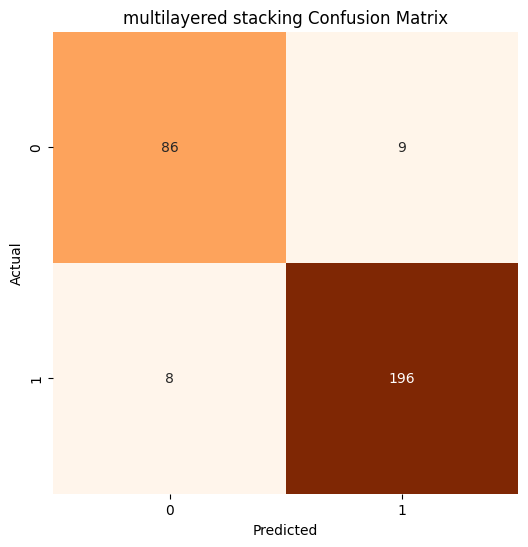

evalution metrics for multilayered stacking classifier
Accuracy: 0.9431438127090301
precision: 0.9560975609756097
recall: 0.9607843137254902
f1_score: 0.9584352078239609


In [31]:
# Evaluating the model
cm_stacking =confusion_matrix(y_test, stacking_clf.predict(X_test))
plt.figure(figsize=(6,6))
sns.heatmap(cm_stacking, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.title('multilayered stacking Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("evalution metrics for multilayered stacking classifier")
print("Accuracy:", metrics.accuracy_score(y_test, stacking_clf.predict(X_test)))
print("precision:", metrics.precision_score(y_test, stacking_clf.predict(X_test)))
print("recall:", metrics.recall_score(y_test, stacking_clf.predict(X_test)))
print("f1_score:", metrics.f1_score(y_test, stacking_clf.predict(X_test)))

In [36]:
from joblib import dump

dump(stacking_clf, "model.joblib")


['model.joblib']

In [32]:
import pickle

In [33]:
pickle.dump(stacking_clf, open('stacking_clf.sav', 'wb'))

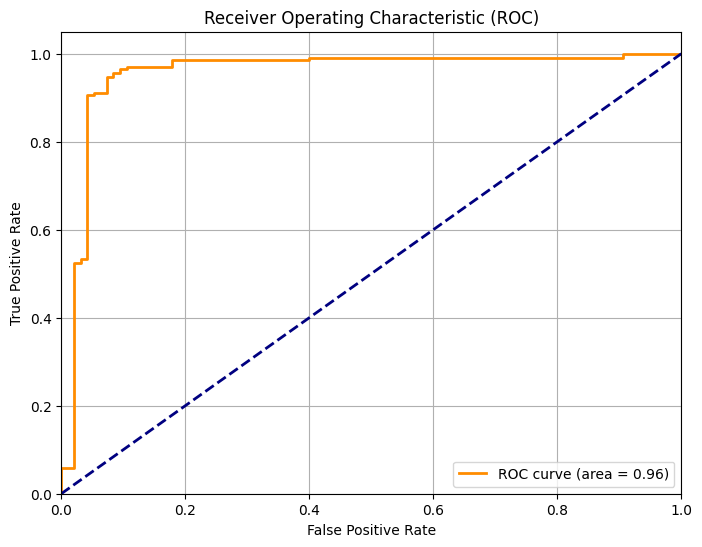

In [34]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predicting probabilities for the positive class
y_prob = stacking_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


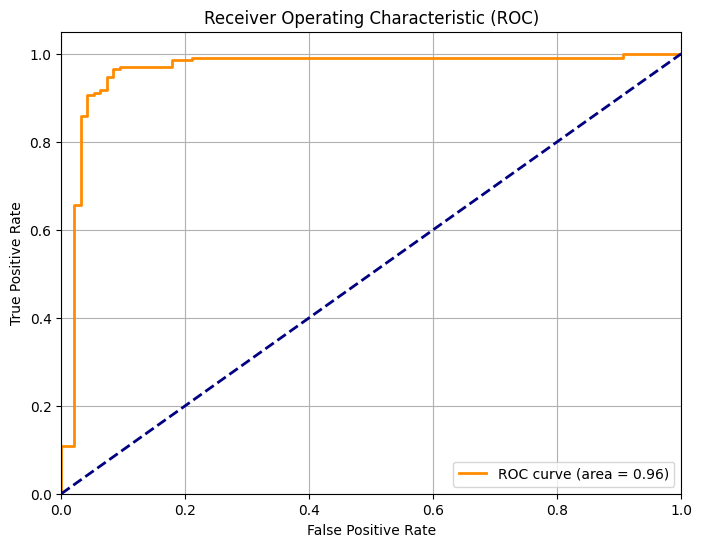

In [26]:
# prompt: plot roc auc curve

import matplotlib.pyplot as plt
# Predicting probabilities for the positive class
y_prob = stacking_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
